In [1]:
# Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
# Charger l'ensemble de données
data = pd.read_csv('diabetes.csv')  

# Afficher les premières lignes de l'ensemble de données
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
print(data.info())
print("\n\n")
print(data.describe())
print("\n\n")
print("Shape of our dataset is",data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None



       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std 

![Formule de corrélation de Pearson](https://latex.codecogs.com/svg.latex?%5Cdpi%7B150%7D&space;%5Cbg_black&space;%5Ccolor%7Bwhite%7D&space;%5Clarge&space;r_%7BXY%7D&space;=&space;%5Cfrac%7B%5Csum_%7Bi=1%7D%5E%7Bn%7D(X_i-%5Cbar%7BX%7D)(Y_i-%5Cbar%7BY%7D)%7D%7B%5Csqrt%7B%5Csum_%7Bi=1%7D%5E%7Bn%7D(X_i-%5Cbar%7BX%7D)%5E2%7D%5Csqrt%7B%5Csum_%7Bi=1%7D%5E%7Bn%7D(Y_i-%5Cbar%7BY%7D)%5E2%7D%7D)


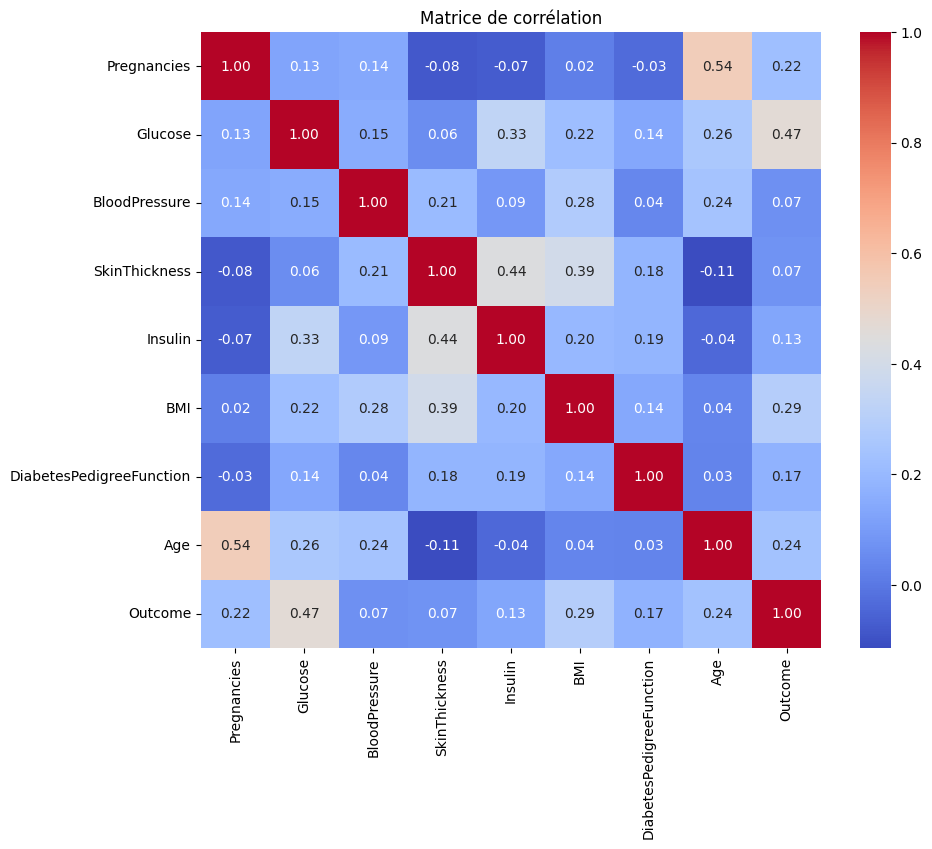

In [4]:
# Calcul de la matrice de corrélation
correlation_matrix = data.corr()
# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Diviser les données en variables explicatives (X) et variable cible (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créer le modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Afficher le rapport de classification et la matrice de confusion
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

[[79 20]
 [18 37]]


In [6]:
# Sauvegarder le modèle
import joblib


joblib.dump(model, 'diabetes_model.pkl')

# Sauvegarder le scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']